<a href="https://www.kaggle.com/code/manthanvarmas/bhagvad-gita-every-analysis-possible?scriptVersionId=246487465" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sentence_transformers import SentenceTransformer, util
import spacy
from collections import Counter
from textblob import TextBlob

2025-06-20 09:31:55.035327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750411915.278339      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750411915.347562      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/bhagavad-gita-dataset/BHAGAVAD_GITA_DATASET.csv")
df.head()

Unnamed: 0  CHAPTER CHAPTER NAME SANSKRIT  \
0           0        1      Arjun Viṣhād Yog   
1           1        1      Arjun Viṣhād Yog   
2           2        1      Arjun Viṣhād Yog   
3           3        1      Arjun Viṣhād Yog   
4           4        1      Arjun Viṣhād Yog   

                CHAPTER NAME ENGLISH  VERSE NUMBER  \
0  Lamenting the Consequences of War             1   
1  Lamenting the Consequences of War             2   
2  Lamenting the Consequences of War             3   
3  Lamenting the Consequences of War             4   
4  Lamenting the Consequences of War             5   

                                      SANSKRIT VERSE  \
0  धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समव...   
1  सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर...   
2  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।व्...   
3  अत्र शूरा महेष्वासा भीमार्जुनसमा युधियुयुधानो ...   
4  अत्र शूरा महेष्वासा भीमार्जुनसमा युधियुयुधानो ...   

                            SANSKRIT TRANSLITERATION  \
0  dhṛitarāśhtra uvāchadharma-kṣhetre kuru-kṣhetr...   
1  sañjaya uvāchadṛiṣhṭvā tu pāṇḍavānīkaṁ vyūḍhaṁ...   
2  paśhyaitāṁ pāṇḍu-putrāṇām āchārya mahatīṁ cham...   
3  atra śhūrā maheṣhvāsā bhīmārjuna-samā yudhiyuy...   
4  atra śhūrā maheṣhvāsā bhīmārjuna-samā yudhiyuy...   

                                    WORD TRANSLATION  \
0  dhṛitarāśhtraḥ uvācha—Dhritarashtra said;dharm...   
1  sanjayaḥ uvācha—Sanjay said;dṛiṣhṭvā—on observ...   
2  paśhya—behold;etām—this;pāṇḍu-putrāṇām—of the ...   
3  atra—here;śhūrāḥ—powerful warriors;mahā-iṣhu-ā...   
4  atra—here;śhūrāḥ—powerful warriors;mahā-iṣhu-ā...   

                                    SANSKRIT ENGLISH  \
0  dhritarashtra uvachadharma-kshetre kuru-kshetr...   
1  sanjaya uvachadrishtva tu pandavanikam vyudham...   
2  pashyaitam pandu-putranam acharya mahatim cham...   
3  atra shura maheshvasa bhimarjuna-sama yudhiyuy...   
4  atra shura maheshvasa bhimarjuna-sama yudhiyuy...   

                                   VERSE TRANSLATION  \
0  BG 1.1:Dhritarashtra said: O Sanjay, after gat...   
1  BG 1.2:Sanjay said: On observing the Pandava a...   
2  BG 1.3:Duryodhan said: Respected teacher!  Beh...   
3  BG 1.4-6:Behold in their ranks are many powerf...   
4  BG 1.4-6:Behold in their ranks are many powerf...   

                                    VERSE COMMENTARY  
0  The two armies had gathered on the battlefield...  
1  Sanjay understood Dhritarashtra’s concern, who...  
2  Duryodhana asked Dronacharya to look at the sk...  
3  Due to his anxiety, the Pandava army seemed mu...  
4  Due to his anxiety, the Pandava army seemed mu...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                701 non-null    int64 
 1   CHAPTER                   701 non-null    int64 
 2   CHAPTER NAME SANSKRIT     701 non-null    object
 3   CHAPTER NAME ENGLISH      701 non-null    object
 4   VERSE NUMBER              701 non-null    int64 
 5   SANSKRIT VERSE            701 non-null    object
 6   SANSKRIT TRANSLITERATION  701 non-null    object
 7   WORD TRANSLATION          701 non-null    object
 8   SANSKRIT ENGLISH          701 non-null    object
 9   VERSE TRANSLATION         701 non-null    object
 10  VERSE COMMENTARY          701 non-null    object
dtypes: int64(3), object(8)
memory usage: 60.4+ KB


In [4]:
total_verses = len(df)
total_chapters = df['CHAPTER'].nunique()
print(f"\nTotal Verses: {total_verses}")
print(f"Total Chapters: {total_chapters}")


Total Verses: 701
Total Chapters: 18


In [5]:
df['VERSE_TRANSLATION_WORD_COUNT'] = df['VERSE TRANSLATION'].apply(lambda x: len(str(x).split()))
df['VERSE_COMMENTARY_WORD_COUNT'] = df['VERSE COMMENTARY'].apply(lambda x: len(str(x).split()))

avg_words_verse = df['VERSE_TRANSLATION_WORD_COUNT'].mean()
avg_words_commentary = df['VERSE_COMMENTARY_WORD_COUNT'].mean()

print(f"\nAverage Words per Verse Translation: {avg_words_verse:.2f}")
print(f"Average Words per Commentary: {avg_words_commentary:.2f}")


Average Words per Verse Translation: 35.83
Average Words per Commentary: 264.82


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


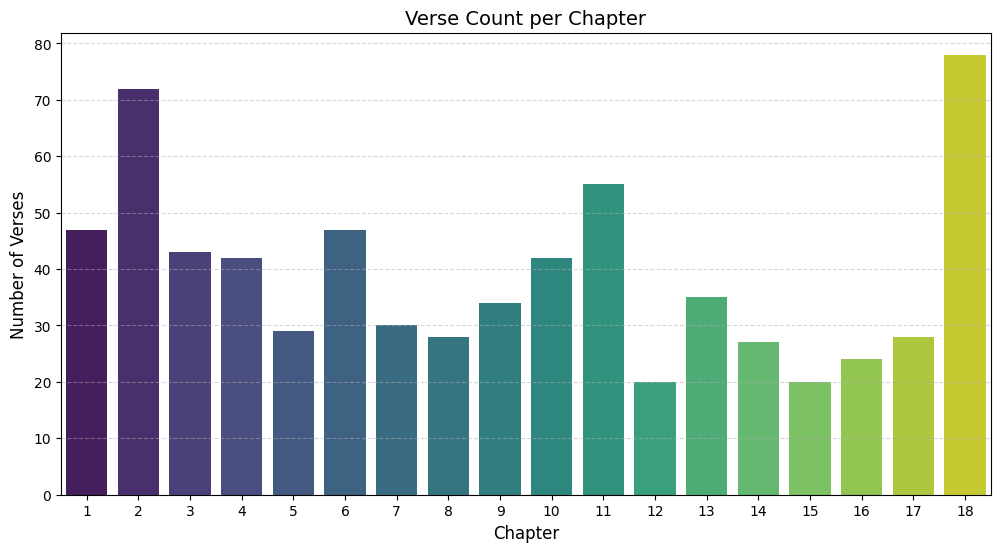

In [6]:
verse_counts = df['CHAPTER'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=verse_counts.index, y=verse_counts.values, palette="viridis")
plt.title("Verse Count per Chapter", fontsize=14)
plt.xlabel("Chapter", fontsize=12)
plt.ylabel("Number of Verses", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


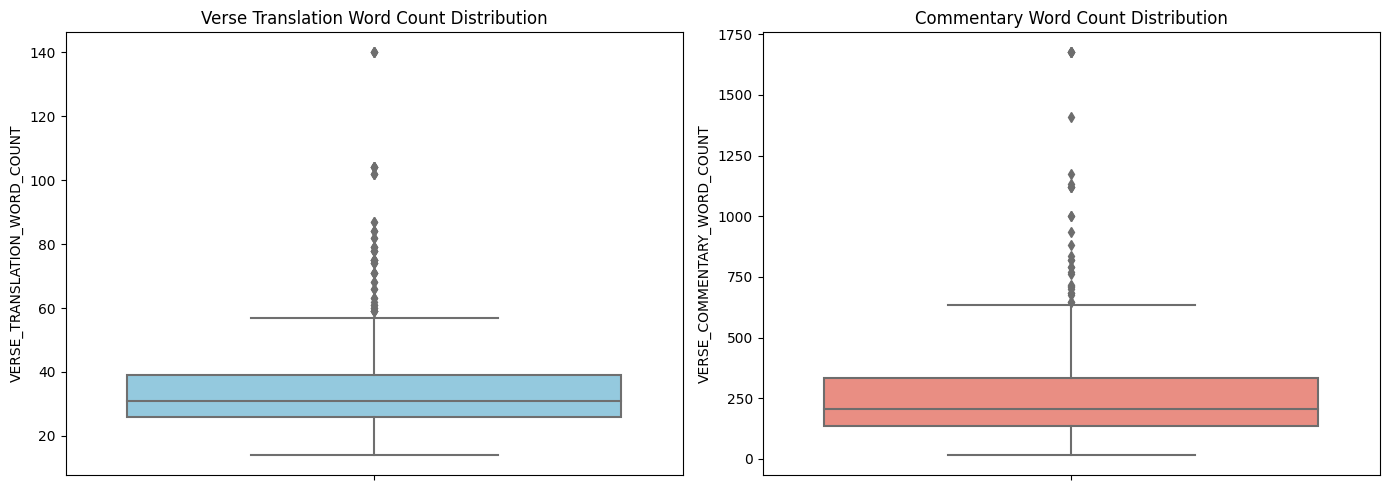

In [7]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='VERSE_TRANSLATION_WORD_COUNT', color='skyblue')
plt.title("Verse Translation Word Count Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='VERSE_COMMENTARY_WORD_COUNT', color='salmon')
plt.title("Commentary Word Count Distribution")

plt.tight_layout()
plt.show()

In [8]:
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def tokenize_clean(text):
    tokens = nltk.word_tokenize(str(text).lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

In [9]:
all_verse_words = []
df['VERSE TRANSLATION'].dropna().apply(lambda x: all_verse_words.extend(tokenize_clean(x)))

verse_word_freq = Counter(all_verse_words).most_common(20)
print("Most Common Words in Verse Translations:\n", verse_word_freq)

Most Common Words in Verse Translations:
 [('bg', 701), ('one', 127), ('supreme', 122), ('arjun', 117), ('knowledge', 115), ('mind', 111), ('said', 93), ('beings', 79), ('divine', 78), ('material', 77), ('senses', 73), ('lord', 69), ('body', 67), ('amongst', 65), ('soul', 64), ('even', 62), ('know', 62), ('nature', 61), ('actions', 59), ('living', 58)]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_c

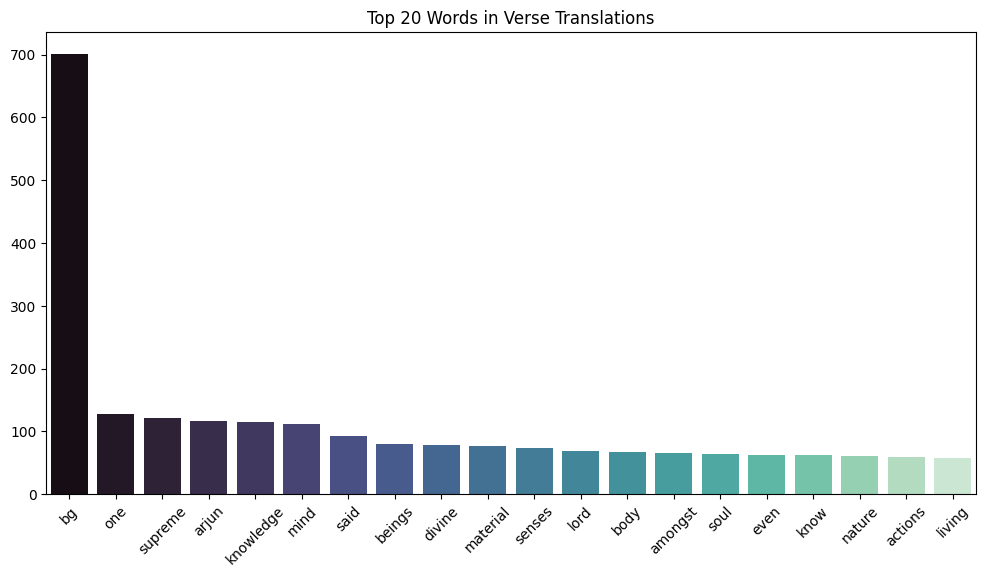

In [10]:
words, freqs = zip(*verse_word_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='mako')
plt.title("Top 20 Words in Verse Translations")
plt.xticks(rotation=45)
plt.show()

In [11]:
all_commentary_words = []
df['VERSE COMMENTARY'].dropna().apply(lambda x: all_commentary_words.extend(tokenize_clean(x)))

commentary_word_freq = Counter(all_commentary_words).most_common(20)
print("Most Common Words in Commentaries:\n", commentary_word_freq)

Most Common Words in Commentaries:
 [('god', 1821), ('krishna', 1236), ('shree', 1145), ('mind', 914), ('one', 759), ('material', 642), ('soul', 576), ('knowledge', 574), ('verse', 535), ('arjun', 520), ('divine', 518), ('also', 510), ('lord', 494), ('world', 454), ('body', 420), ('spiritual', 367), ('life', 364), ('form', 355), ('thus', 352), ('even', 351)]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_c

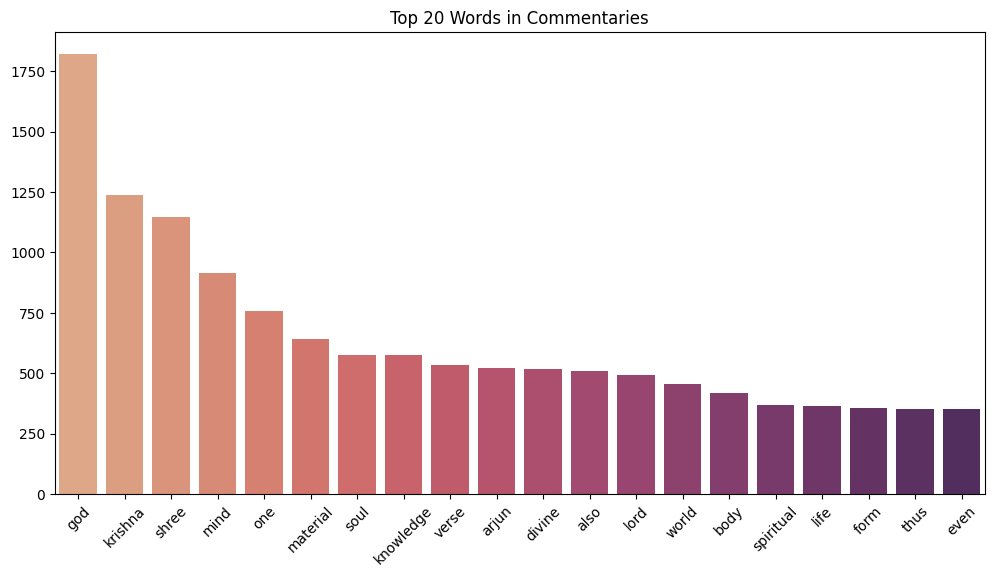

In [12]:
words, freqs = zip(*commentary_word_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='flare')
plt.title("Top 20 Words in Commentaries")
plt.xticks(rotation=45)
plt.show()

In [13]:
verse_text = " ".join(df['VERSE TRANSLATION'].dropna())
commentary_text = " ".join(df['VERSE COMMENTARY'].dropna())

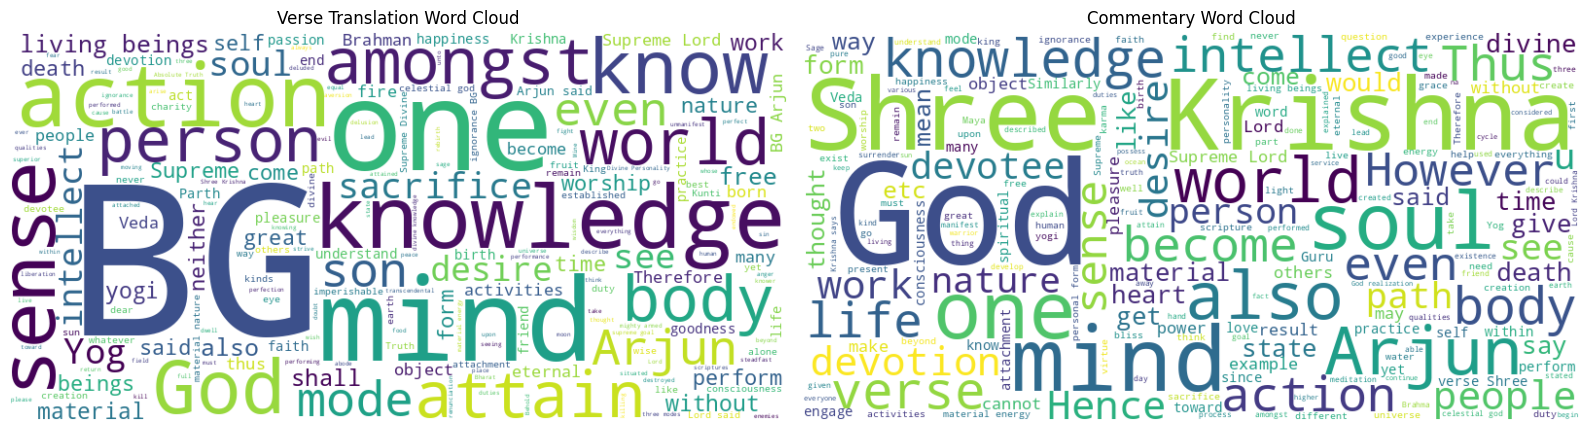

In [14]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
wc_verse = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(verse_text)
plt.imshow(wc_verse, interpolation='bilinear')
plt.axis('off')
plt.title("Verse Translation Word Cloud")

plt.subplot(1, 2, 2)
wc_commentary = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(commentary_text)
plt.imshow(wc_commentary, interpolation='bilinear')
plt.axis('off')
plt.title("Commentary Word Cloud")

plt.tight_layout()
plt.show()

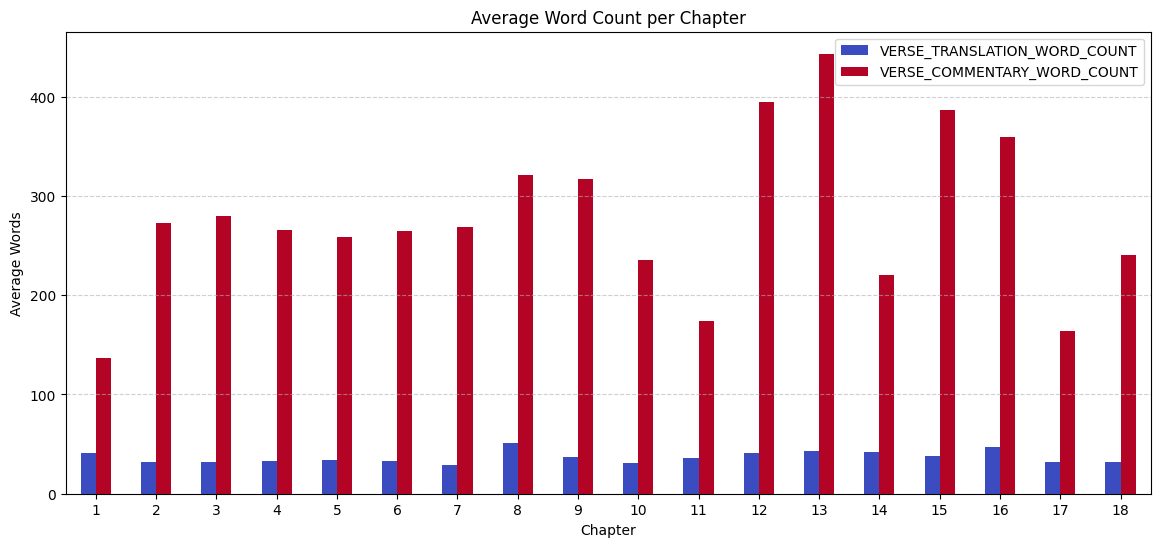

In [15]:
chapter_word_stats = df.groupby("CHAPTER")[["VERSE_TRANSLATION_WORD_COUNT", "VERSE_COMMENTARY_WORD_COUNT"]].mean()

chapter_word_stats.plot(kind='bar', figsize=(14, 6), colormap="coolwarm")
plt.title("Average Word Count per Chapter")
plt.ylabel("Average Words")
plt.xlabel("Chapter")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

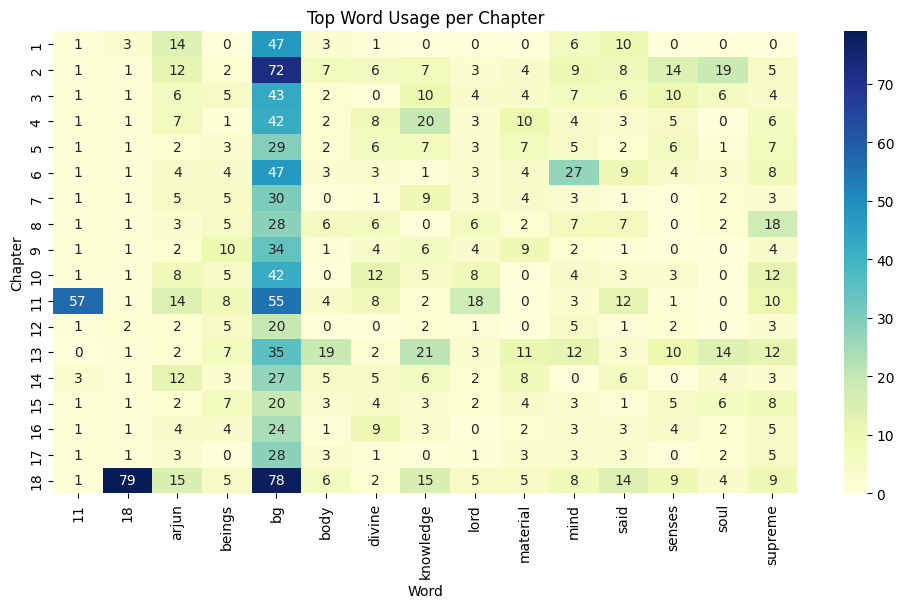

In [16]:
chapter_text = df.groupby("CHAPTER")["VERSE TRANSLATION"].apply(lambda x: " ".join(x)).reset_index()

vectorizer = CountVectorizer(stop_words='english', max_features=15)
X = vectorizer.fit_transform(chapter_text["VERSE TRANSLATION"])

heat_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=chapter_text["CHAPTER"])

plt.figure(figsize=(12, 6))
sns.heatmap(heat_df, cmap="YlGnBu", annot=True)
plt.title("Top Word Usage per Chapter")
plt.xlabel("Word")
plt.ylabel("Chapter")
plt.show()

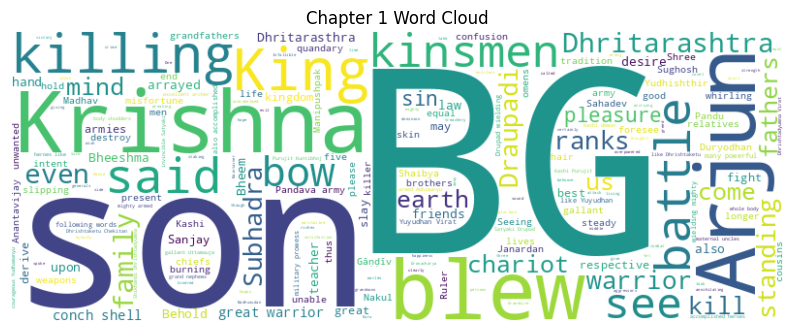

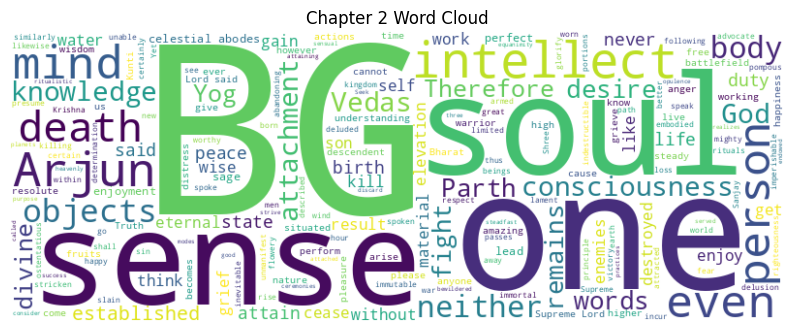

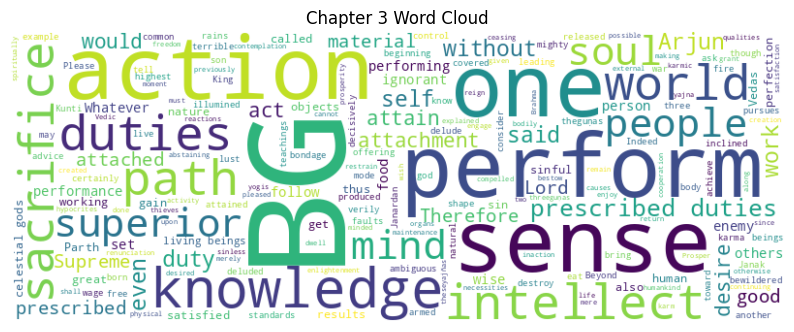

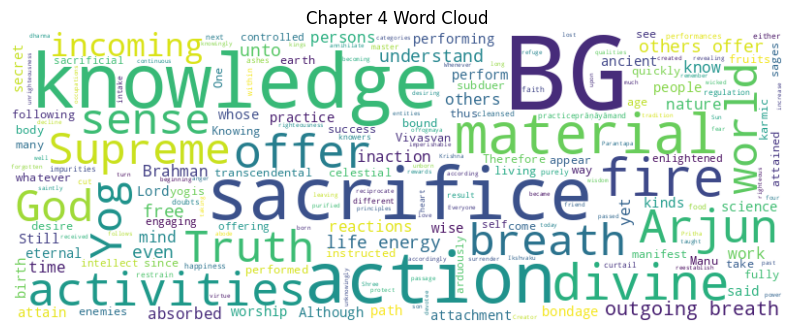

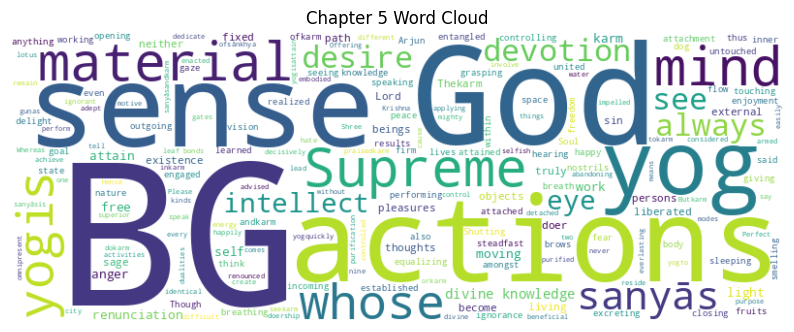

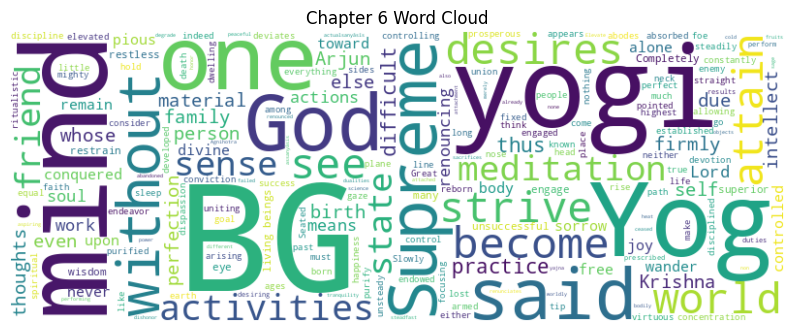

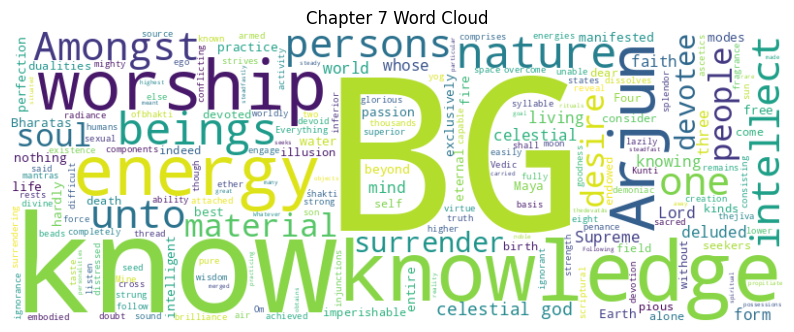

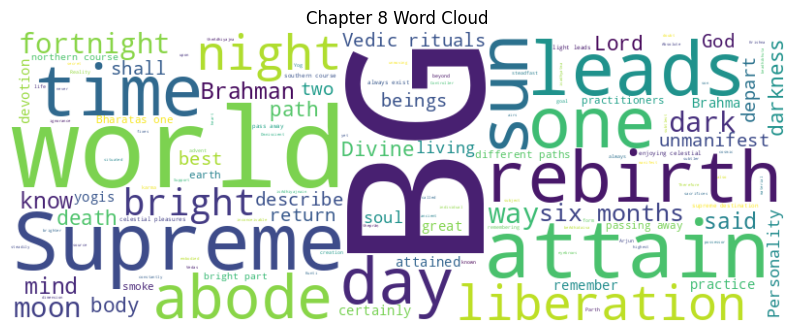

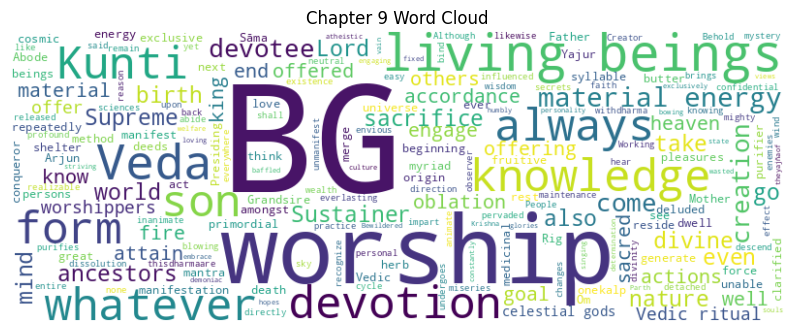

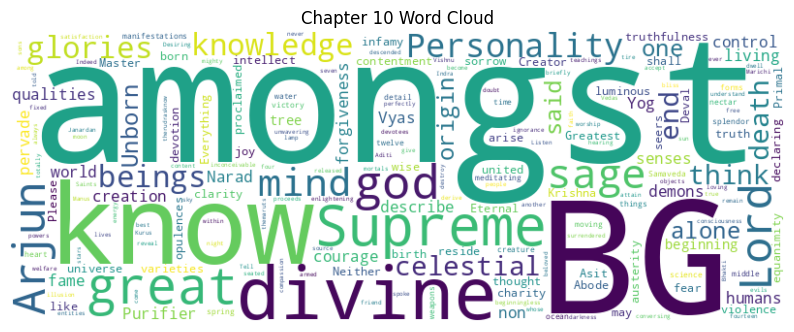

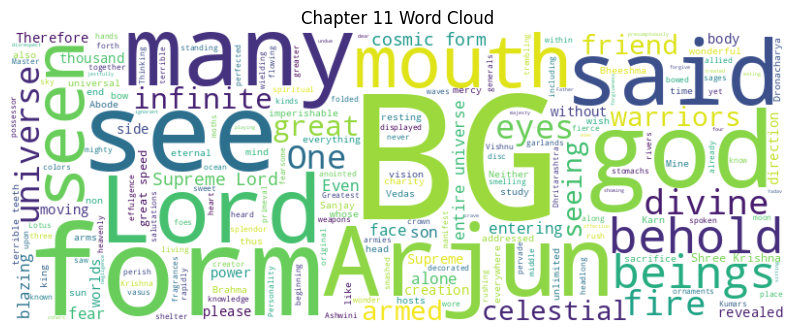

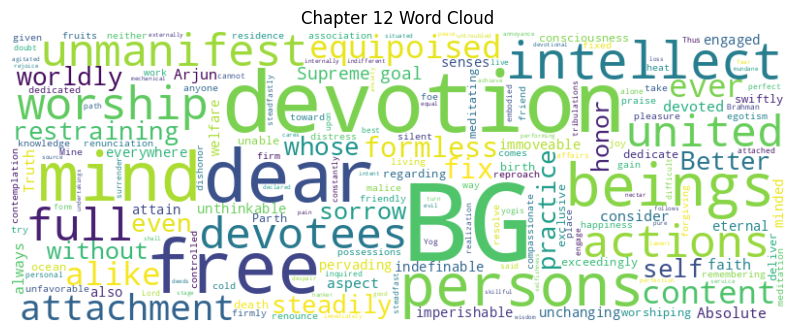

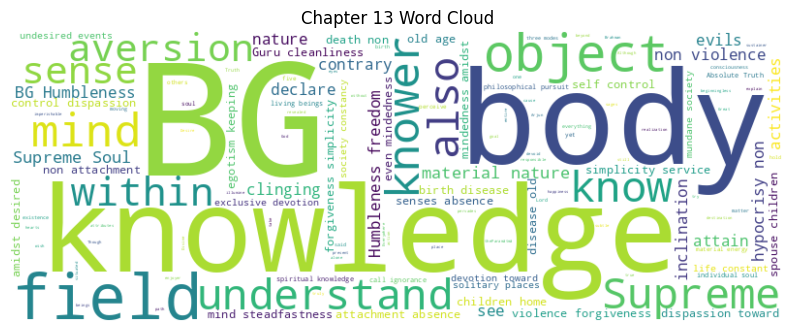

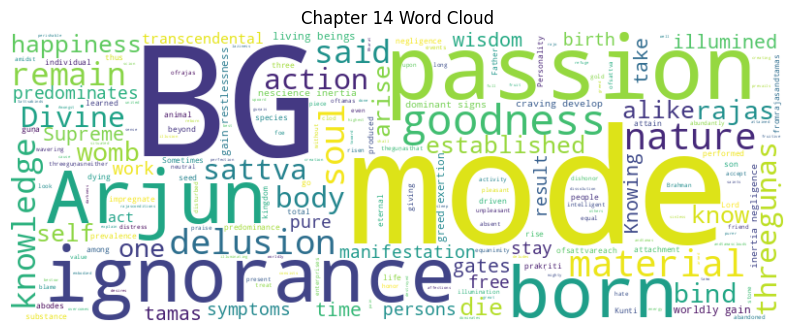

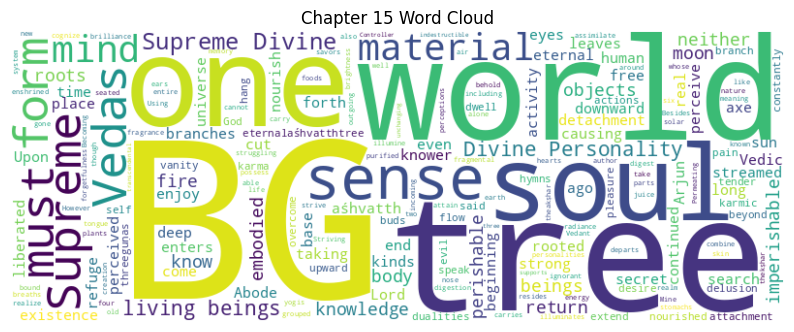

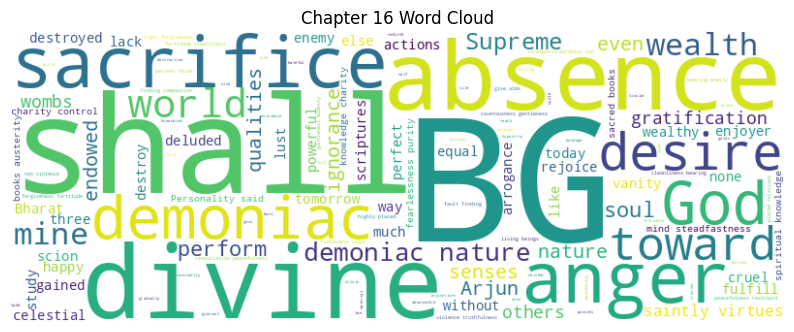

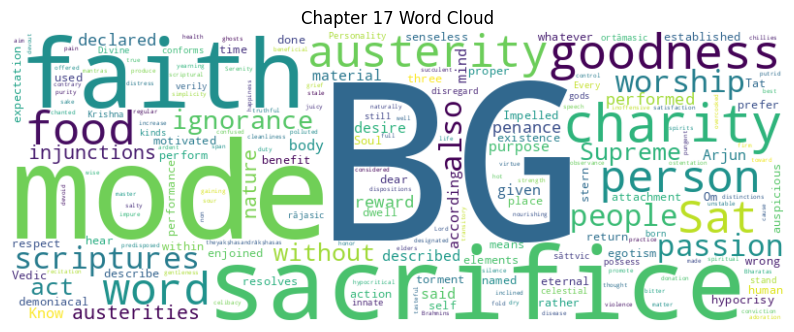

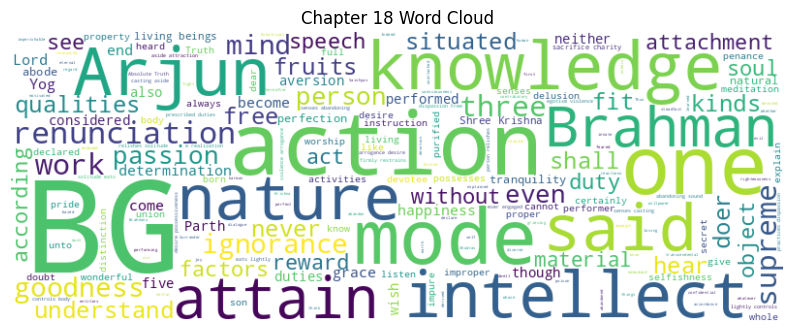

In [17]:
for chapter in sorted(df['CHAPTER'].unique()):
    text = " ".join(df[df['CHAPTER'] == chapter]['VERSE TRANSLATION'].dropna())
    wordcloud = WordCloud(width=800, height=300, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Chapter {chapter} Word Cloud")
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

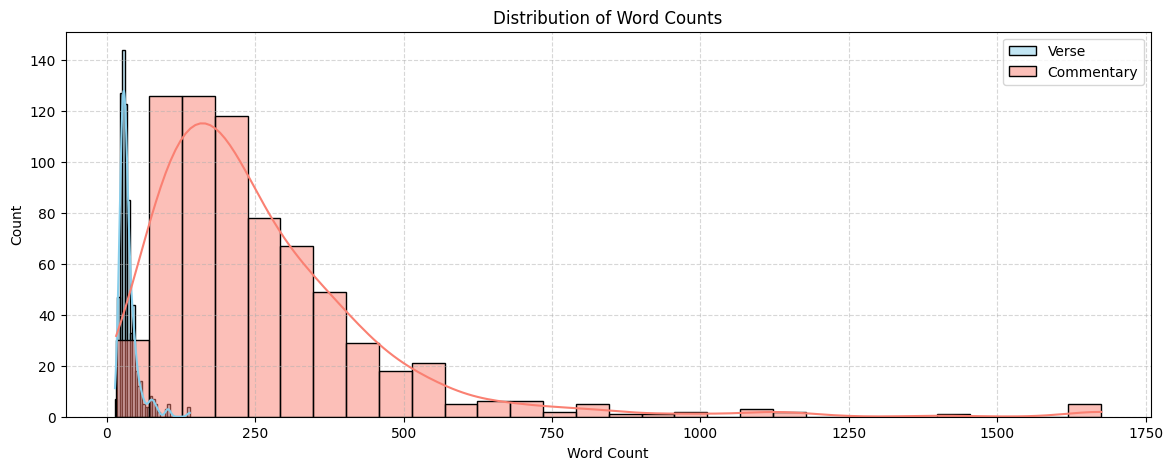

In [18]:
plt.figure(figsize=(14, 5))

sns.histplot(df['VERSE_TRANSLATION_WORD_COUNT'], kde=True, bins=30, color='skyblue', label='Verse')
sns.histplot(df['VERSE_COMMENTARY_WORD_COUNT'], kde=True, bins=30, color='salmon', label='Commentary')

plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [19]:
commentaries = df['VERSE COMMENTARY'].dropna().apply(lambda x: " ".join(tokenize_clean(x)))

vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(commentaries)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

for index, topic in enumerate(lda.components_):
    print(f"Top 10 words for Topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("------")

pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, dtm, vectorizer)

Top 10 words for Topic #0:
['devotion', 'king', 'supreme', 'verse', 'form', 'lord', 'arjun', 'god', 'shree', 'krishna']
------
Top 10 words for Topic #1:
['life', 'senses', 'worldly', 'attachment', 'knowledge', 'world', 'spiritual', 'intellect', 'god', 'mind']
------
Top 10 words for Topic #2:
['performed', 'nature', 'work', 'shree', 'mode', 'perform', 'krishna', 'duties', 'people', 'actions']
------
Top 10 words for Topic #3:
['spiritual', 'path', 'mind', 'devotion', 'verse', 'divine', 'shree', 'krishna', 'knowledge', 'god']
------
Top 10 words for Topic #4:
['life', 'souls', 'shree', 'krishna', 'world', 'energy', 'body', 'god', 'material', 'soul']
------


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.008640 -0.200480       1        1  24.584177
0     -0.034402  0.115333       2        1  22.391292
4     -0.081090  0.029309       3        1  21.394385
3     -0.121124  0.013330       4        1  20.787100
2      0.227977  0.042509       5        1  10.843047, topic_info=          Term         Freq        Total Category  logprob  loglift
753       mind   904.000000   904.000000  Default  30.0000  30.0000
1100      soul   563.000000   563.000000  Default  29.0000  29.0000
51       arjun   496.000000   496.000000  Default  28.0000  28.0000
504        god  1777.000000  1777.000000  Default  27.0000  27.0000
726   material   630.000000   630.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
51       arjun    53.116816   496.218216   Topic5  -4.7732  -0.0129
566      human    36.068054   140.126984   Topic5  -5.1603   0.8645
1123    states    38.364986   290.825611   Topic5  -5.0986   0.1961
403    example    34.467868   134.020563   Topic5  -5.2057   0.8637
726   material    34.646794   630.571556   Topic5  -5.2005  -0.6798

[349 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.848561  ability
1         2  0.062090  ability
1         4  0.062090  ability
4         2  0.080298   abodes
4         3  0.662461   abodes
...     ...       ...      ...
1300      2  0.072537      yog
1300      3  0.104776      yog
1300      4  0.644778      yog
1301      2  0.078075     yoga
1301      4  0.897857     yoga

[759 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

              precision    recall  f1-score   support

           1       0.83      0.56      0.67         9
           2       0.47      0.86      0.61        21
           3       1.00      0.20      0.33        10
           4       1.00      0.33      0.50         6
           5       0.00      0.00      0.00         8
           6       0.29      0.57      0.38         7
           7       0.00      0.00      0.00         5
           8       1.00      0.30      0.46        10
           9       1.00      0.29      0.44         7
          10       0.67      0.89      0.76         9
          11       0.50      1.00      0.67         7
          12       0.00      0.00      0.00         4
          13       1.00      0.67      0.80         9
          14       1.00      0.67      0.80         3
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         4
          17       1.00      1.00      1.00         4
          18       0.46    

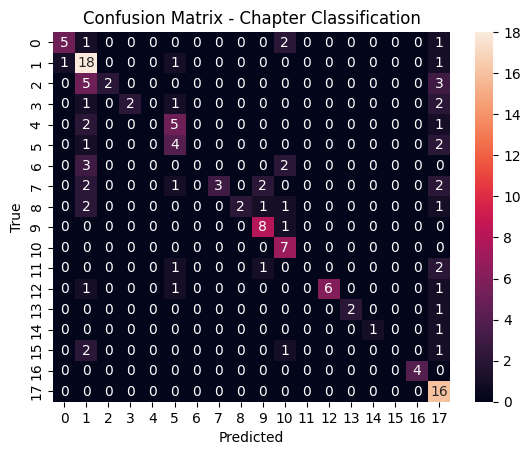

In [20]:
X = df['VERSE TRANSLATION'].fillna('')
y = df['CHAPTER']

tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_vec = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Chapter Classification")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [21]:
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(df['VERSE TRANSLATION'].fillna('').tolist(), convert_to_tensor=True)

query = "soul and detachment"
query_vec = model.encode(query, convert_to_tensor=True)

cos_scores = util.pytorch_cos_sim(query_vec, embeddings)[0]
top_results = cos_scores.topk(5)

print(f"\nTop matches for: \"{query}\"")
for idx in top_results[1]:
    print("\n", df.iloc[idx.item()]['VERSE TRANSLATION'])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Top matches for: "soul and detachment"

 BG 2.13:Just as the embodied soul continuously passes from childhood to youth to old age, similarly, at the time of death, the soul passes into another body. The wise are not deluded by this.

 BG 2.25:The soul is spoken of as invisible, inconceivable, and unchangeable. Knowing this, you should not grieve for the body.

 BG 2.22:As a person sheds worn-out garments and wears new ones, likewise, at the time of death, the soul casts off its worn-out body and enters a new one.

 BG 15.7:The embodied souls in this material world are My eternal fragmental parts.  But bound by material nature, they are struggling with the six senses including the mind.

 BG 13.33:Space holds everything within it, but being subtle, does not get contaminated by what it holds.  Similarly, though its consciousness pervades the body, the soul is not affected by the attributes of the body.


In [22]:
nlp = spacy.load("en_core_web_sm")

In [23]:
samples = df[['VERSE TRANSLATION', 'VERSE COMMENTARY']].dropna().sample(5, random_state=42)

for idx, row in samples.iterrows():
    print(f"\n📘 VERSE: {row['VERSE TRANSLATION']}")
    doc = nlp(row['VERSE TRANSLATION'])
    print("Entities:", [(ent.text, ent.label_) for ent in doc.ents])

    print(f"💬 COMMENTARY:")
    doc2 = nlp(row['VERSE COMMENTARY'][:500])
    print("Entities:", [(ent.text, ent.label_) for ent in doc2.ents])


📘 VERSE: BG 18.58:If you always remember Me, by My grace you shall overcome all obstacles and difficulties. But if, due to pride, you do not listen to My advice, you will perish.
Entities: [('18.58', 'CARDINAL')]
💬 COMMENTARY:
Entities: [('Arjun', 'PERSON'), ('Shree Krishna', 'PERSON')]

📘 VERSE: BG 4.3:The same ancient knowledge of Yog, which is the supreme secret, I am today revealing unto you, because you are My friend as well as My devotee, who can understand this transcendental wisdom.
Entities: [('BG', 'ORG'), ('Yog', 'ORG'), ('today', 'DATE')]
💬 COMMENTARY:
Entities: [('Shree Krishna', 'PERSON'), ('Arjun', 'PERSON'), ('two', 'CARDINAL'), ('Yog', 'ORG'), ('theBhagavad Gitais', 'FAC')]

📘 VERSE: BG 2.8:I can find no means of driving away this anguish that is drying up my senses. Even if I win a prosperous and unrivalled kingdom on the earth, or gain sovereignty like the celestial gods, I will be unable to dispel this grief.
Entities: [('BG', 'ORG')]
💬 COMMENTARY:
Entities: [('Arj

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_c

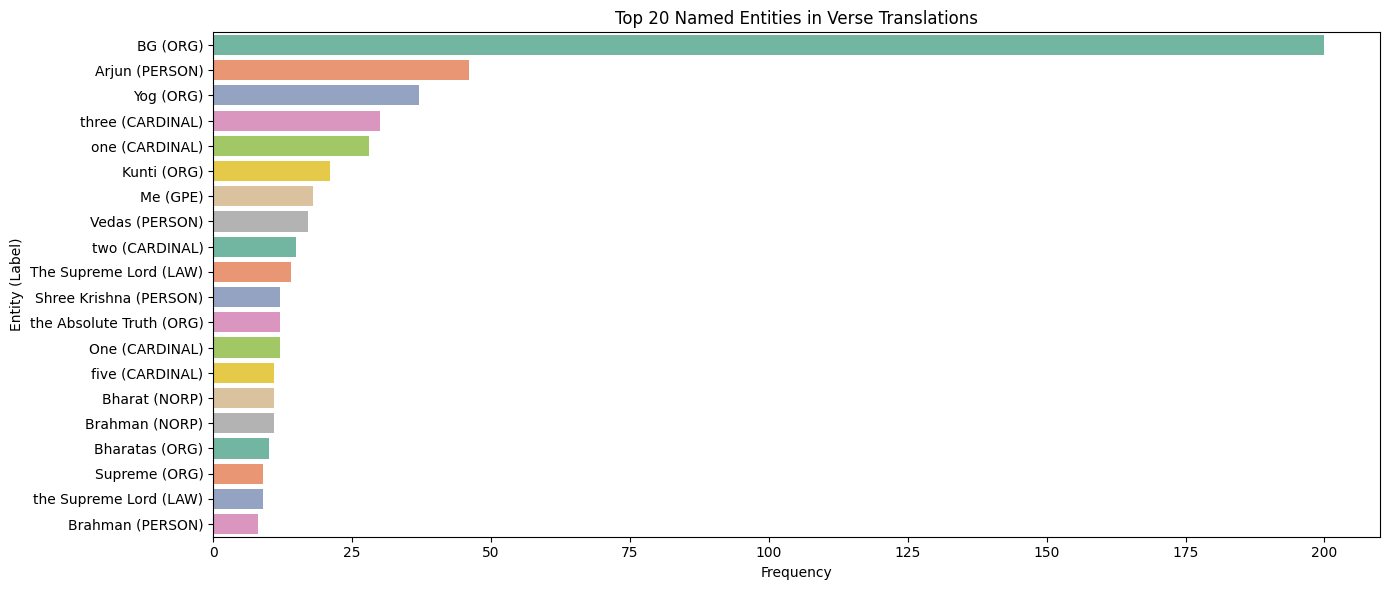

In [24]:
all_entities = []
for text in df['VERSE TRANSLATION'].dropna():
    doc = nlp(str(text))
    all_entities.extend([(ent.text.strip(), ent.label_) for ent in doc.ents if ent.text.strip()])

entity_counter = Counter(all_entities)
top_entities = entity_counter.most_common(20)

if top_entities:
    labels, values = zip(*top_entities)
    entities_text = [f"{text} ({label})" for (text, label) in labels]

    plt.figure(figsize=(14, 6))
    sns.barplot(x=list(values), y=list(entities_text), palette="Set2")
    plt.title("Top 20 Named Entities in Verse Translations")
    plt.xlabel("Frequency")
    plt.ylabel("Entity (Label)")
    plt.tight_layout()
    plt.show()
else:
    print("No named entities found in the data.")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


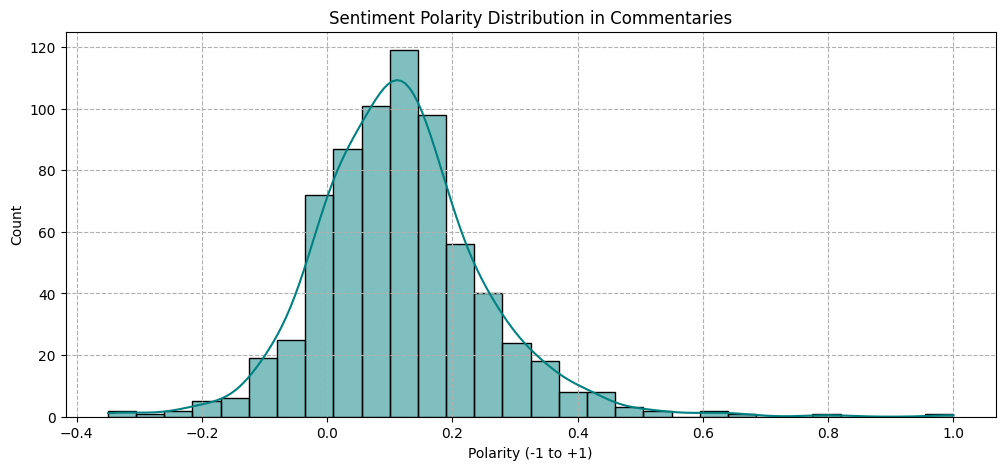

In [25]:
df['COMMENTARY_POLARITY'] = df['VERSE COMMENTARY'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['COMMENTARY_SUBJECTIVITY'] = df['VERSE COMMENTARY'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

plt.figure(figsize=(12, 5))
sns.histplot(df['COMMENTARY_POLARITY'], bins=30, color='teal', kde=True)
plt.title("Sentiment Polarity Distribution in Commentaries")
plt.xlabel("Polarity (-1 to +1)")
plt.grid(True, linestyle='--')
plt.show()

In [26]:
def clean_text(text):
    tokens = nltk.word_tokenize(str(text).lower())
    return " ".join([t for t in tokens if t.isalpha() and t not in stopwords.words('english')])

df['CLEAN_COMMENTARY'] = df['VERSE COMMENTARY'].apply(clean_text)
texts = df['CLEAN_COMMENTARY'].dropna().tolist()

vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(texts)

lda_model = LatentDirichletAllocation(n_components=6, random_state=42)
lda_model.fit(dtm)

words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{i+1}:")
    print([words[i] for i in topic.argsort()[-10:]])

pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_model, dtm, vectorizer)


Topic #1:
['devotion', 'divine', 'verse', 'supreme', 'form', 'arjun', 'lord', 'shree', 'god', 'krishna']

Topic #2:
['krishna', 'path', 'life', 'attachment', 'world', 'knowledge', 'spiritual', 'intellect', 'god', 'mind']

Topic #3:
['action', 'performed', 'shree', 'krishna', 'mode', 'people', 'duties', 'perform', 'work', 'actions']

Topic #4:
['spiritual', 'devotion', 'path', 'mind', 'divine', 'verse', 'shree', 'krishna', 'knowledge', 'god']

Topic #5:
['divine', 'life', 'krishna', 'souls', 'world', 'energy', 'body', 'god', 'material', 'soul']

Topic #6:
['kill', 'shree', 'god', 'son', 'krishna', 'war', 'father', 'king', 'said', 'arjun']


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.071002 -0.064664       1        1  23.198505
1     -0.049118  0.001156       2        1  21.251297
4     -0.017531 -0.118697       3        1  20.100426
3      0.001861 -0.121070       4        1  16.814622
2     -0.199920  0.142150       5        1   9.395685
5      0.193707  0.161125       6        1   9.239464, topic_info=         Term        Freq       Total Category  logprob  loglift
753      mind  905.000000  905.000000  Default  30.0000  30.0000
51      arjun  503.000000  503.000000  Default  29.0000  29.0000
1100     soul  564.000000  564.000000  Default  28.0000  28.0000
25    actions  223.000000  223.000000  Default  27.0000  27.0000
695      lord  477.000000  477.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
695      lord   30.543844  477.618088   Topic6  -5.1665  -0.3680
679      life   29.459458  359.232413   Topic6  -5.2027  -0.1193
1287    world   29.349388  447.114296   Topic6  -5.2064  -0.3419
1237    verse   28.063329  521.002353   Topic6  -5.2512  -0.5396
682      like   27.376634  170.591184   Topic6  -5.2760   0.5521

[395 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.103026  ability
1         2  0.865421  ability
1         4  0.041211  ability
5         2  0.947193  absence
7         2  0.929246   absorb
...     ...       ...      ...
1301      4  0.909357     yoga
1302      1  0.013632     yogi
1302      2  0.136321     yogi
1302      3  0.286275     yogi
1302      4  0.558918     yogi

[964 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 4, 3, 6])